* 데이터 셋

In [2]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

* train , test, input, target 데이터 분리

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

* **선형회귀**

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)


# 50cm 농어 예측
print(f"예측값{lr.predict([[50]])},선형회귀직선의 기울기 {lr.coef_}, y절편{lr.intercept_}")

예측값[1241.83860323],선형회귀직선의 기울기 [39.01714496], y절편-709.0186449535477


* 선형회귀 직선을 그래프로 표현

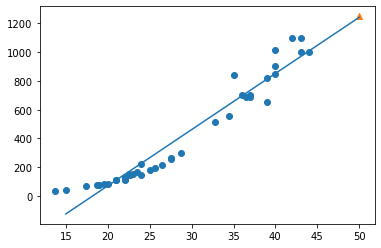

In [23]:
import matplotlib.pyplot as plt

# 산점도
plt.scatter(train_input, train_target)

# 15~50의 1차방정식
plt.plot([15,50], [15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터 (점)
plt.scatter(50, 1248.8, marker="^")
plt.show()

* train - test 점수

In [24]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


* **다항회귀**

In [27]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [29]:
# 칼럼이 1씩 늘어나면서 2차항이 된것을 볼 수 있음
print(train_poly.shape, test_poly.shape)
print(train_input.shape, test_input.shape)

(42, 2) (14, 2)
(42, 1) (14, 1)


* 다항회귀 모델 학습

In [38]:
lr2 = LinearRegression()
lr2.fit(train_poly, train_target)

perch50 = lr2.predict([[50**2,50]])
perch50

array([1573.98423528])

* 다항회귀 곡선의 계수와 절편

In [32]:
print(lr2.coef_, lr2.intercept_)

[  1.01433211 -21.55792498] 116.05021078278304


무게 = $ 1.01 \times 길이^2 -21.6 \times 길이 + 116.05 $ 의 식이 된다

* 다항회귀 곡선 그리기

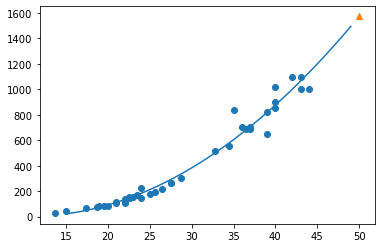

In [41]:
# 곡선은 구간별 직선으로 그린다
# 정수배열을 만든다
point = np.arange(15,50)

# 산점도
plt.scatter(train_input, train_target)

# 15~49 까지의 2차 그래프
plt.plot(point, lr2.coef_[0]*point**2 + lr2.coef_[1]*point + lr2.intercept_)

# 50cm 농어
plt.scatter(50,perch50, marker="^")
plt.show()

In [43]:
print(lr2.score(train_poly, train_target))
print(lr2.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
